# Graph manipulation basics

This notebook accompanies chapter 3 of "Programming Applied Mathematics for Security". This code largely focuses on how to generate various displays, and any bits of graph theory that couldn't fit into the main text.

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Circle
import numpy as np

def draw_network(G,pos,ax,sg=None):

    for n in G:
        c=Circle(pos[n],radius=0.08, color='r')
        ax.add_patch(c)
        G.nodes[n]['patch']=c
        x,y=pos[n]
        label = ax.annotate(n, xy=(x-0.04, y-0.04), fontsize=14, color="w")
    seen={}
    for (u,v,d) in G.edges(data=True):
        n1=G.nodes[u]['patch']
        n2=G.nodes[v]['patch']
        rad=0.1
        if (u,v) in seen:
            rad=seen.get((u,v))
            rad=(rad+np.sign(rad)*0.1)*-1
        alpha=0.5
        color='black'

        e = FancyArrowPatch(n1.center,n2.center,patchA=n1,patchB=n2,
                            arrowstyle='-|>',
                            connectionstyle='arc3,rad=%s'%rad,
                            mutation_scale=10.0,
                            lw=2,
                            alpha=alpha,
                            color=color)
        seen[(u,v)]=rad
        ax.add_patch(e)
        ax.xticks = []
    return e

This next cell generates the fist example graph from the chapter. It is saved in two formats to assist in the editorial process for the book.

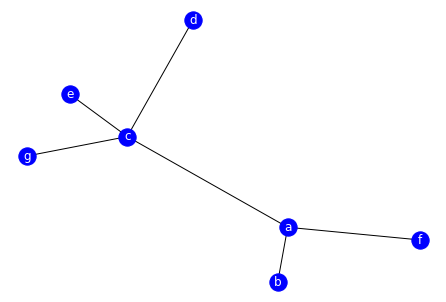

In [2]:
G=nx.Graph()  # Create the default Graph object
G.add_node('f')  # add a node manually
G.add_node('g')  # add a node manually
G.add_edge('a', 'b', weight=0.6)  # Will add missing nodes and connecting edge
G.add_edge('a', 'c', weight=0.2)  # Will add missing nodes and connecting edge
G.add_edge('c', 'd', weight=0.1)  # Will add missing nodes and connecting edge
G.add_edge('c', 'e', weight=0.7)  # Will add missing nodes and connecting edge
G.add_edge('g', 'c', weight=0.8)  # Will add missing nodes and connecting edge
G.add_edge('f', 'a', weight=0.5)  # Will add missing nodes and connecting edge
pos = nx.layout.spring_layout(G)  # Try to optimize layout 
nx.draw(G, pos, with_labels=True, font_color="w", node_color="b")
plt.savefig("Figure_3-3.svg", format="svg")
plt.savefig("Figure_3-3.png")
plt.show()

These pieces of code show the general work pattern when dealing with NetworkX which is to load the map, calculate some statistical metrics, and finally save the metrics as attributes of the graph.

In [3]:
closeness_scores = nx.closeness_centrality(G)
nx.set_node_attributes(G, name="closeness", values=closeness_scores)
G.nodes["c"]["closeness"]

0.75

In [4]:
b_scores = nx.betweenness_centrality(G, normalized=True)
nx.set_node_attributes(G, name="between", values=b_scores)
G.nodes["c"]["between"]

0.8

In [5]:
d_scores = nx.degree_centrality(G)
nx.set_node_attributes(G, name="degree", values=d_scores)
G.nodes["c"]["degree"]

0.6666666666666666

# Clique graphs

Many approaches to understanding a network's topology consider methods by which dense connections are built. Typically, they move from simple structures (such as dyads or more often triads) to more dense structures like cliques. Approaching social topology in this manner focuses on how the inter-connectivity of large social structures can be constructed from combining smaller connected components (hence the phrase "tight-knit community"). This can be though of as a bottom up approach to reasoning about the structure.Formally, a clique is the maximum number of nodes which all share interconnections present among themselves. A Maximal Clique subgraph is such a grouping, expanded to include as many nodes as possible. intuitively you can think of this graph as the largest connected component in a graph. 


This creates a graph to exemplify clique structures. Using a planar layout attempts to lay the nodes and edges out so they do not overlap. 

/home/dreilly/anaconda3/envs/researchenv/lib/python3.7/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


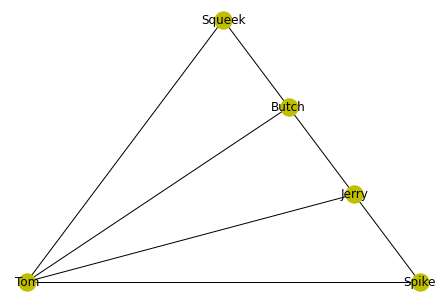

In [6]:
clique_graph = nx.Graph()
clique_graph.add_edges_from(
    [
        ("Tom", "Jerry"),
        ("Butch", "Jerry"),
        ("Spike", "Jerry"),
        ("Spike", "Tom"),
        ("Tom", "Squeek"),
        ("Tom", "Butch"),
        ("Squeek", "Butch")
    ]
)
pos = pos = nx.planar_layout(clique_graph)
nx.draw(clique_graph,pos,with_labels=True, node_color="y")
plt.savefig("Figure_3-5.svg", format="svg")
plt.savefig("Figure_3-5.png")
plt.show()

In [7]:
clq = nx.algorithms.number_of_cliques(clique_graph)
tot = nx.algorithms.graph_number_of_cliques(clique_graph)
for m in clq:
    print(m, (clq[m]/tot))

Tom 1.0
Jerry 0.6666666666666666
Butch 0.6666666666666666
Spike 0.3333333333333333
Squeek 0.3333333333333333


In [8]:
c_scores = nx.closeness_centrality(clique_graph, distance='attribute_name')
c_scores


{'Tom': 1.0,
 'Jerry': 0.8,
 'Butch': 0.8,
 'Spike': 0.6666666666666666,
 'Squeek': 0.6666666666666666}

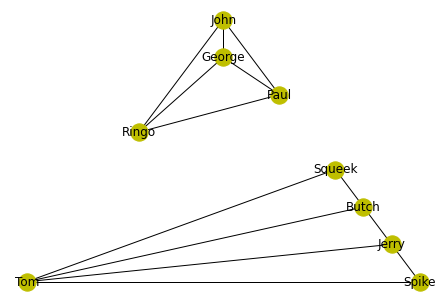

In [9]:
clique_graph.add_edges_from(
    [
        ("George", "Ringo"),
        ("George", "Paul"),
        ("George", "John"),
        ("Ringo", "Paul"),
        ("Ringo", "John"),
        ("John", "Paul"),
    ]
)
pos = pos = nx.planar_layout(clique_graph)
nx.draw(clique_graph,pos,with_labels=True, node_color="y")
plt.savefig("Book_Resources/Chapter 4 - Graph theory/Figure_3-6.svg", format="svg")
plt.savefig("Book_Resources/Chapter 4 - Graph theory/Figure_3-6.png")
plt.show()

In [10]:
comm_scores = nx.communicability(clique_graph)
print(comm_scores["Tom"])

{'Tom': 6.0799319337284174, 'Jerry': 4.824058213305523, 'Butch': 4.824058213305523, 'Spike': 3.698960969978588, 'Squeek': 3.698960969978588, 'George': 0.0, 'Ringo': 0.0, 'Paul': 0.0, 'John': 0.0}


# Eigenvalues and Eigenvectors

The NetworkX version of the communicability-centrality algorithm computes Eigenvalues and Eigenvectors of the adjacency matrixof the graph. In an unweighted graph, an adjacency matrix is a $V$*$V$ Binary Matrix. An element in the binary adjacency matrix $A$ is keyed off the two nodes it represents in the source graph. An element $A$<sub>$(u,j)$</sub> is one if there exists an edge $(u,v)$ in $E$, otherwise it is zero. In an undirected graph $A$(u,v)=$A$<sub>$(u,j)$</sub>. However, this property doesn’t hold for directed graphs. The decomposition of a square matrix $A$ into eigenvalues and eigenvectors is known as eigen decomposition. This decomposition is always possible as long as the matrix consisting of the eigenvectors of $A$ is square. This property is known as the eigen decomposition theorem (http://mathworld.wolfram.com/Eigenvector.html). 

Informally an eigenvector (also called a characteristic vector) is a property of a linear transformation. It describes a non-zero vector that changes by a set scalar factor $\lambda$, when the linear transformation is applied to it. We denote the eigenvector of $A$ as.$v$<sub>$(j)$</sub> Using this definition, the communicability centrality of a node $u$ can be found using a spectral decomposition of the adjacency matrix. 

In [12]:
e_scores = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, name='eigen', values=e_scores)
print(G.nodes["c"]["eigen"])

0.6279613109379251


Eigenvectors can be viewed themselves, as a measure of centrality. You can learn more in “The mathematics of networks” (M. E. J. Newman. PDF (http://www-personal.umich.edu/~mejn/papers/palgrave.pdf). Retrieved 2019-07-15). The short version is the measure computes a node’s centrality based on the relative centrality of it’s neighbors. It accounts for the condition that not all connections offer the same value. You can think of this intuitively as knowing (connecting with) a large number of important people, makes you more important by virtue of proximity. Luckily, the hard work of implementing the algorithm has been abstracted away.

# Multigraphs, Digraphs, and MultiDigraphs,

When dealing with multiple edges Networkx displays the edges overlapping each other. this makes a MultiDigraph indistinguishable for a regular DiGraph. To get a better visual you need to add a arc to the edge display. 

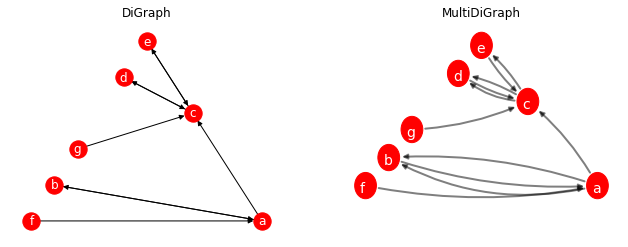

In [16]:
G=nx.MultiDiGraph()  # Create the default Graph object
G.add_node('f')  # add a node manually
G.add_node('g')  # add a node manually
G.add_edge('a', 'b', weight=0.6)  # Will add missing nodes and connecting edge
G.add_edge('b', 'a', weight=0.6)  # Will add missing nodes and connecting edge
G.add_edge('a', 'b', weight=0.6)  # Will add missing nodes and connecting edge
G.add_edge('a', 'c', weight=0.2)  # Will add missing nodes and connecting edge
G.add_edge('c', 'd', weight=0.1)  # Will add missing nodes and connecting edge
G.add_edge('c', 'd', weight=0.1)  # Will add missing nodes and connecting edge
G.add_edge('d', 'c', weight=0.1)  # Will add missing nodes and connecting edge
G.add_edge('c', 'e', weight=0.7)  # Will add missing nodes and connecting edge
G.add_edge('e', 'c', weight=0.35)  # Will add missing nodes and connecting edge
G.add_edge('g', 'c', weight=0.8)  # Will add missing nodes and connecting edge
G.add_edge('f', 'a', weight=0.5)  # Will add missing nodes and connecting edge
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11,4))
pos = nx.planar_layout(G)
draw_network(G, pos, ax[1])
dG = nx.DiGraph()
dG.add_edges_from(G.edges(data=True))
nx.draw(dG, pos, with_labels=True, ax=ax[0], node_color="r", font_color="white")
ax[0].autoscale()
ax[1].autoscale()
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
#plt.axis('equal')
ax[0].axis("off")
ax[0].set_title("DiGraph")
ax[1].set_title("MultiDiGraph")
plt.axis("off")
plt.savefig("Book_Resources/Chapter 4 - Graph theory/Figure_3-7.svg", format="svg")
plt.savefig("Book_Resources/Chapter 4 - Graph theory/Figure_3-7.png")
plt.show()

When dealing with directionality you have two additional metrics that are specific to directed edges. The in-degree and out-degree metrics measure the connection into, or out of, a node 

In [58]:
i_scores = nx.in_degree_centrality(G)
o_scores = nx.in_degree_centrality(G)
nx.set_node_attributes(G, name='in-degree', values=i_scores)
nx.set_node_attributes(G, name='out-degree', values=o_scores)
print(G.node["c"]["in-degree"], G.node["c"]["out-degree"])

0.3333333333333333 0.3333333333333333
